# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data
from scipy import math
import requests
import datetime
from datetime import datetime

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
import wrangle
import prepare

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

#### Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
df = wrangle.store_item_sales()
df = prepare.prep_store_data(df)
df.head(3)

Reading merged data from csv file...


,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,sales_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,January,Tuesday
2013-01-01,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,218.40,January,Tuesday
2013-01-01,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,125.55,January,Tuesday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   store_id       913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_state    913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  sales_total    913000 non-null  float64
 13  month          913000 non-null  object 
 14  day_of_week    913000 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 111.5+ MB


In [4]:
# train, validate, test split
# Human Method (split by year)

train = df.loc[:'2016']
test = df.loc['2017']

train.shape , test.shape

((730500, 15), (182500, 15))

<AxesSubplot:xlabel='sale_date'>

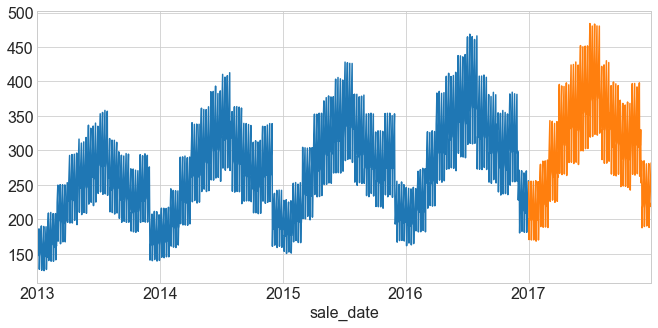

In [11]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [6]:
y_train = train.resample('D').sales_total.mean()

y_train.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

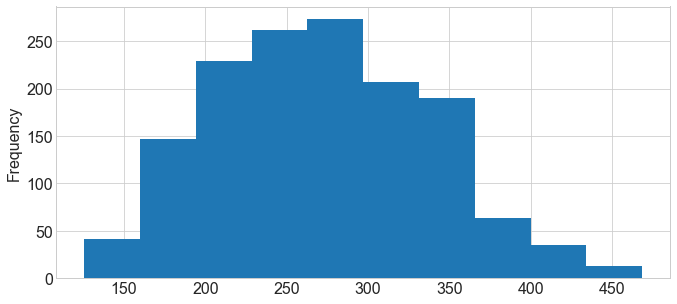

In [7]:
y_train.plot.hist()

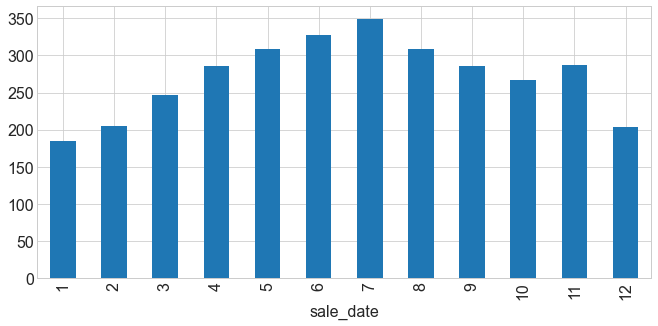

In [13]:
ax = train.groupby(train.index.month).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

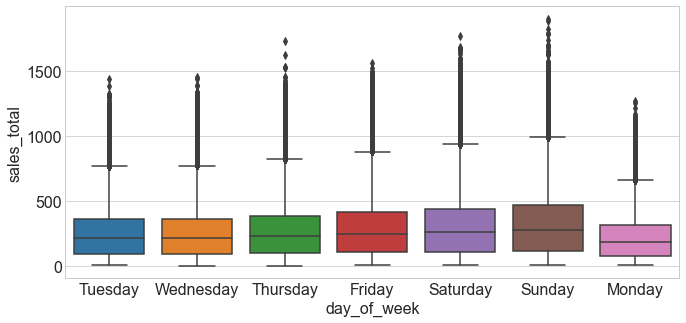

In [14]:
sns.boxplot(data=train, y='sales_total', x='day_of_week')

In [9]:
# Sales total ranges around $150 and $450
# Summer months seem to be the busier months (small bump in Nov, perhaps Thanksgiving)


### Target Over Time

<AxesSubplot:xlabel='sale_date'>

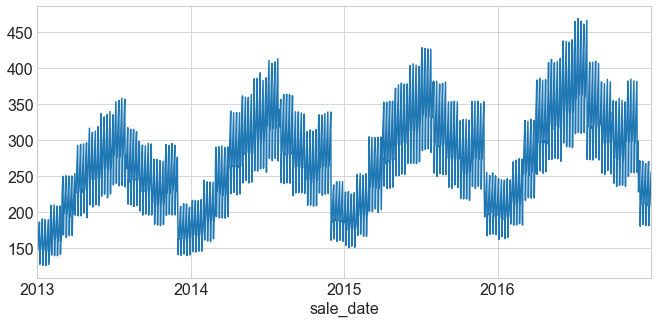

In [48]:
y_train.plot()

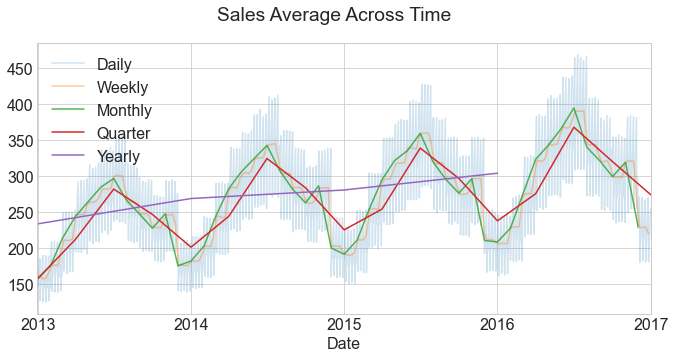

In [24]:
plt.suptitle('Sales Average Across Time')
y_train.plot(alpha=.2, label='Daily')
y_train.resample('W').mean().plot(alpha=.4, label='Weekly')
y_train.resample('M').mean().plot(alpha=.8, label='Monthly')
y_train.resample('3M').mean().plot(label='Quarter')
y_train.resample('Y').mean().plot(label='Yearly')
plt.xlabel('Date')

plt.legend()
plt.show()

In [ ]:
# 
#

### Change Over Time

<AxesSubplot:title={'center':'Week-to-Week Change in Sales'}, xlabel='Date By Week'>

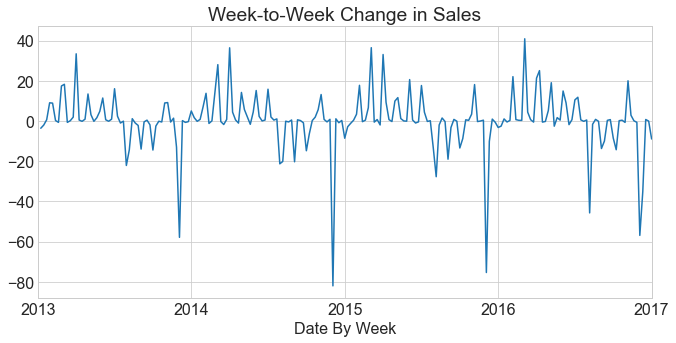

In [51]:
y_train.resample('W').mean().diff().plot(title='Week-to-Week Change in Sales', xlabel='Date By Week')

<AxesSubplot:title={'center':'Quarterly Changes in Sales'}, xlabel='Date By Quarter'>

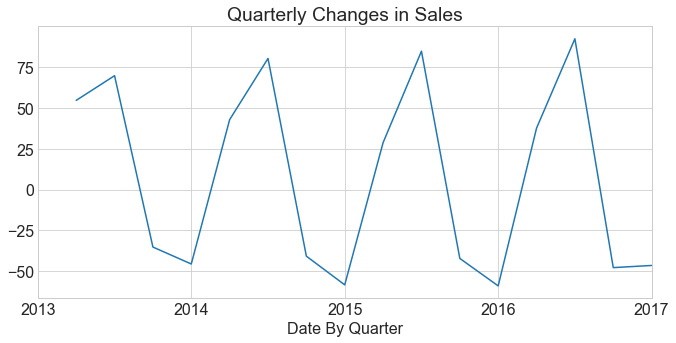

In [52]:
y_train.resample('3M').mean().diff().plot(title='Quarterly Changes in Sales', xlabel='Date By Quarter')

<AxesSubplot:title={'center':'Day-to-Day Changes in Sales'}, xlabel='Date'>

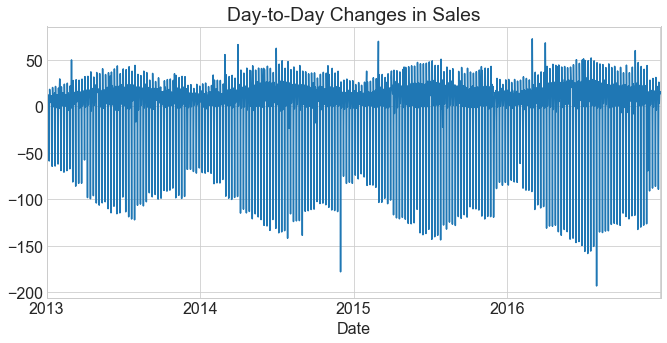

In [53]:
y_train.resample('D').mean().diff().plot(title='Day-to-Day Changes in Sales', xlabel='Date')

<AxesSubplot:title={'center':'Mean Change in Sales for a Week'}, xlabel='Day of the Week'>

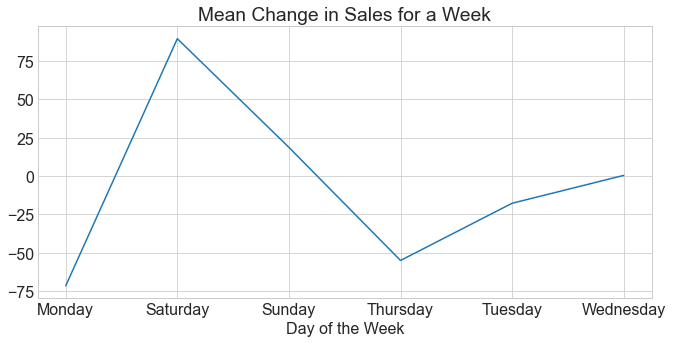

In [69]:
train.groupby('day_of_week').sales_total.mean().diff().plot(title='Mean Change in Sales for a Week', xlabel='Day of the Week')

In [ ]:
# definite signs of seasonality
# 

### Lag Plot

In [43]:
train['y(t+1)'] = train.sales_total.shift(-1)
train.head()

/var/folders/08/8cpsy8b90ddg4tfjy9502gzw0000gn/T/ipykernel_4583/2528326324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t+1)'] = train.sales_total.shift(-1)


,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,sales_total,month,day_of_week,sales_bin,y(t+1)
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,January,Tuesday,Very Low,218.40
2013-01-01,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,218.40,January,Tuesday,Low,125.55
2013-01-01,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,125.55,January,Tuesday,Low,453.60
2013-01-01,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,453.60,January,Tuesday,Very High,294.00
2013-01-01,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,294.00,January,Tuesday,High,344.40


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

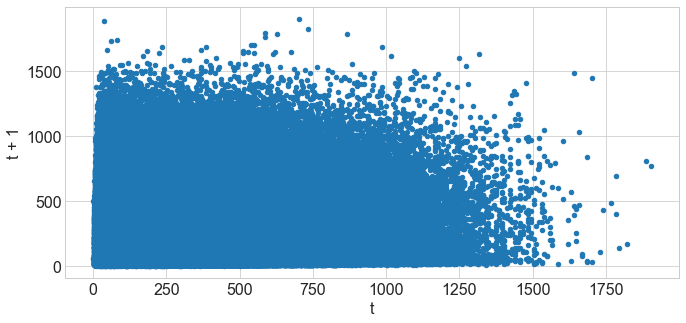

In [46]:
ax = train.plot.scatter(x='sales_total', y='y(t+1)')
ax.set(xlabel='t', ylabel='t + 1')